**TITLE: TO IMPLEMENT KOHONEN'S SOM TO MNIST DATA AND STUDY THE CLUSTERING PROCESS WITH RESPECT TO DIFFERENT VALUES OF HYPERPARAMETERS**



**INTRODUCTION**

**INTUTION BEHIND WORKING OF NEURAL NETWORK**

It takes several inputs, processes it through multiple neurons from multiple hidden layers, and returns the result using an output layer. This result estimation process is technically known as “Forward Propagation“.

Next, we compare the result with actual output. The task is to make the output to the neural network as close to the actual (desired) output. Each of these neurons is contributing some error to the final output. How do you reduce the error?

We try to minimize the value/ weight of neurons that are contributing more to the error and this happens while traveling back to the neurons of the neural network and finding where the error lies. This process is known as “Backward Propagation“.

In order to reduce this number of iterations to minimize the error, the neural networks use a common algorithm known as “Gradient Descent”, which helps to optimize the task quickly and efficiently.

This is how Neural networks work.

**Self Organizing Map (or Kohonen Map or SOM)** is a type of Artificial Neural Network which is also inspired by biological models of neural systems from the 1970s. It follows an unsupervised learning approach and trained its network through a competitive learning algorithm. SOM is used for clustering and mapping (or dimensionality reduction) techniques to map multidimensional data onto lower-dimensional which allows people to reduce complex problems for easy interpretation. SOM has two layers, one is the Input layer and the other one is the Output layer. 

**How do SOM works?**

Let’s say an input data of size (m, n) where m is the number of training examples and n is the number of features in each example. First, it initializes the weights of size (n, C) where C is the number of clusters. Then iterating over the input data, for each training example, it updates the winning vector (weight vector with the shortest distance (e.g Euclidean distance) from training example). Weight updation rule is given by : 

wij = wij(old) + alpha(t) *  (xik - wij(old))

where alpha is a learning rate at time t, j denotes the winning vector, i denotes the ith feature of training example and k denotes the kth training example from the input data. After training the SOM network, trained weights are used for clustering new examples. A new example falls in the cluster of winning vectors. 

**Algorithm**

The steps involved are :  

1. Weight initialization

2. Select a training example

3. Compute the winning vector

4. Update the winning vector

5. Repeat steps 3, 4, 5 for all training examples.

6. Clustering the test sample

**OBJECTIVES**

Here, in this analysis our main objective is,

To implement Kohonen's SOM to MNIST data and Study the clustering process with respect to different values of hyperparameters.

**PACKAGES AND LIBRARIES**

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import numpy as np
import pandas as pd

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Import package for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=28efff6e94e09639e4d5fbe046979a92ecd5a0eafe22994123cedca4f59bc36b
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
#Loading Minisom library and module which we use later for performing Self Organizing Maps.
from minisom import MiniSom 


**METHODOLOGY**

Data Description

---



In [ ]:
#load dataset
dataset = pd.read_csv("/content/mnist_train.csv")
dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Exploratory Data Analysis

---



Now we perform some basic EDA on this dataset. 

In [ ]:
#Obtaining the dimension of the dataset.
X.shape

(16613, 785)

It is observed that the dataset comprises of 53929 records and 785 columns(variables) which are described in the data description. 

From the above table, it is observed that there does not exist any null value in the dataset hence we can further proceed with the analysis.

In [ ]:
#Obtaining the descriptive measure using describe() function
dataset.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,16623.000000,16623.0,16623.0,16623.0,16623.0,16623.0,16623.0,16623.0,16623.0,16623.0,...,16622.000000,16622.000000,16622.000000,16622.000000,16622.000000,16622.0,16622.0,16622.0,16622.0,16622.0
mean,4.446129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.194983,0.132535,0.089761,0.054326,0.024606,0.0,0.0,0.0,0.0,0.0
std,2.894710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.925287,4.715930,4.217209,3.056218,1.644453,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,154.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Finding the sum of missing values per column if present
dataset.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration        0
campaign        0
pdays           0
previous        0
subscription    0
poutcome        0
dtype: int64

Thus there are no null values in the dataset.

Data Preprocessing

---



In [ ]:
#output variable is not needed in the problem since it is unsupervised algorithm. 
#We can remove output variable label and independent variable are stored under X
# Defining X variables for the input of SOM
X = dataset.iloc[0:16613, 1:785].values
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Scaling or normalizing the dataset and stored in a dataframe.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***MODELLING:***









**1. Studying the clustering process with respect to different values of hyperparameters.**



---



**CASE 2:**

***When hyperparameters are:***

 Dimension of output layer is 10 x 10

 Number of iterations that is number of epochs is 20000

 Sigma, the radius of neghbourhood is 1
 
 Learning rate = 0.5

In [ ]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

In [ ]:
# define SOM:

som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=784, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights

som.random_weights_init(X)

# Training

som.train_random(X, iterations)

In [ ]:
# Returns the distance map from the weights:
som.distance_map()

array([[0.23883993, 0.41532594, 0.38015202, 0.4050793 , 0.50955906,
        0.58021347, 0.44269415, 0.44119743, 0.51405439, 0.27459914],
       [0.44170937, 0.71160734, 0.71822386, 0.63405847, 0.7818321 ,
        0.76590244, 0.78822631, 0.74728433, 0.83318913, 0.47784039],
       [0.57532688, 0.81300569, 0.77103103, 0.79832129, 0.76707733,
        0.84194935, 0.71556081, 0.77251477, 0.74967341, 0.50119391],
       [0.53435663, 0.85295226, 0.93352819, 0.82393769, 0.93886882,
        0.86444611, 0.81524858, 0.73136487, 0.72873363, 0.44733693],
       [0.52518196, 0.84622318, 0.89055869, 1.        , 0.84886546,
        0.87615293, 0.73802037, 0.77852306, 0.75423025, 0.49517956],
       [0.56079589, 0.84980357, 0.84189223, 0.90611104, 0.87164248,
        0.79821089, 0.8103701 , 0.85074633, 0.9209583 , 0.6059148 ],
       [0.48187537, 0.78136915, 0.8109875 , 0.80053265, 0.8701017 ,
        0.78577863, 0.7756069 , 0.84032805, 0.86602354, 0.59681227],
       [0.50140556, 0.77327462, 0.8277865

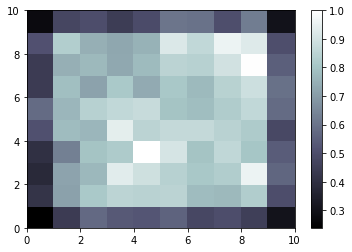

In [ ]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T) # Distance map as background reference
colorbar()
show()

From the above distance map we can measure the distance between the weight vector and winner neuron nd we can say on observing the above map that darker the color is less is the distance, and lighter the color more is the distance.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  from ipykernel import kernelapp as app


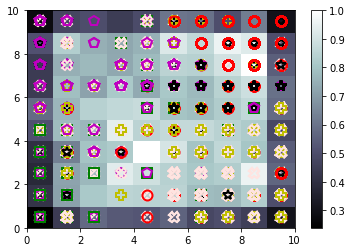

In [ ]:
y = dataset.iloc[:,0].values
bone()

pcolor(som.distance_map().T)

colorbar()
markers = ['o', 's','m','M','p','P','*','k','X','b'] 

colors = ['r', 'g','b','c','m','y','k','khaki','mistyrose','hotpink']

for i, x in enumerate(X):

    w = som.winner(x)

    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],  markeredgecolor = colors[y[i]],  markerfacecolor = 'None',  markersize = 10,  markeredgewidth = 2)

show()

***CASE 2:***

 ***When hyperparameters are:***

 Dimension of output layer is 30 X 30

 Number of iterations that is number of epochs is 10000

 Sigma, the radius of neghbourhood is 2
 
 Learning rate = 0.8

In [ ]:
# Setting different hyper parameters
som_grid_rows1 = 30
som_grid_columns1 = 30
iterations1 = 10000
sigma1 = 2
learning_rate1 = 0.8

In [ ]:
# define SOM:

som1 = MiniSom(x = som_grid_rows1, y = som_grid_columns1, input_len=784, sigma=sigma1, learning_rate=learning_rate1)

# Initializing the weights

som1.random_weights_init(X)

# Training

som1.train_random(X, iterations1)

In [ ]:
# Returns the distance map from the weights:
som1.distance_map()

array([[0.26826176, 0.37728906, 0.44367896, 0.50773549, 0.4120792 ,
        0.40519541, 0.34130395, 0.36482566, 0.40675961, 0.42075584,
        0.35467249, 0.36825417, 0.39420689, 0.35683534, 0.27944983,
        0.24235908, 0.26133059, 0.28255653, 0.33591973, 0.39397344,
        0.35941574, 0.35005827, 0.33337577, 0.32211964, 0.35972314,
        0.3748698 , 0.30937035, 0.3761703 , 0.32463347, 0.26333228],
       [0.37858486, 0.6955846 , 0.73289748, 0.76061321, 0.73558522,
        0.67453646, 0.57161448, 0.63506235, 0.61279167, 0.61440755,
        0.60008815, 0.57317675, 0.59810419, 0.58762656, 0.47584447,
        0.39622419, 0.41267871, 0.41068257, 0.48883185, 0.5926949 ,
        0.60029015, 0.53952105, 0.50179738, 0.56738255, 0.60792379,
        0.58644493, 0.61492808, 0.6004419 , 0.59603687, 0.32879404],
       [0.46734553, 0.64122431, 0.77914901, 0.77343572, 0.74273318,
        0.69894213, 0.62764197, 0.567172  , 0.59475012, 0.48956089,
        0.57510126, 0.56764037, 0.64537188, 0.

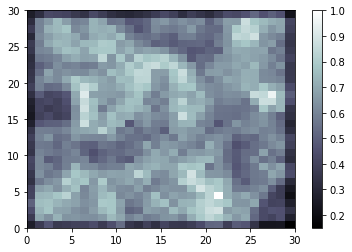

In [ ]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som1.distance_map().T) # Distance map as background reference
colorbar()
show()

From the above distance map we can measure the distance between the weight vector and winner neuron nd we can say on observing the above map that darker the color is less is the distance, and lighter the color more is the distance.

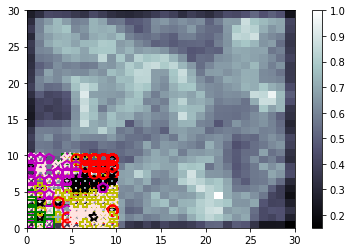

In [ ]:
y = dataset.iloc[:,0].values
bone()

pcolor(som1.distance_map().T)

colorbar()
markers = ['o', 's','m','M','p','P','*','k','X','b'] 

colors = ['r', 'g','b','c','m','y','k','khaki','mistyrose','hotpink']

for i, x in enumerate(X):

    w = som.winner(x)

    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],  markeredgecolor = colors[y[i]],  markerfacecolor = 'None',  markersize = 10,  markeredgewidth = 2)

show()

***CASE 3:***

 ***When hyperparameters are:***

 Dimension of output layer is 5 X 5

 Number of iterations that is number of epochs is 20000

 Sigma, the radius of neghbourhood is 1
 
 Learning rate = 0.5

In [ ]:
# Setting different hyper parameters
som_grid_rows2 = 5
som_grid_columns2 = 5
iterations2 = 20000
sigma2 = 1
learning_rate2= 0.5

In [ ]:
# define SOM:

som2 = MiniSom(x = som_grid_rows2, y = som_grid_columns2, input_len=784, sigma=sigma2, learning_rate=learning_rate2)

# Initializing the weights

som2.random_weights_init(X)

# Training

som2.train_random(X, iterations2)

In [ ]:
# Returns the distance map from the weights:
som2.distance_map()

array([[0.41172332, 0.58294642, 0.52105626, 0.61625804, 0.4777958 ],
       [0.5887916 , 0.9053387 , 0.93489143, 1.        , 0.75126267],
       [0.62479282, 0.90686126, 0.88644184, 0.95929727, 0.63987426],
       [0.56843769, 0.81246774, 0.79626113, 0.8697423 , 0.4600809 ],
       [0.33457914, 0.50150837, 0.50680912, 0.48741514, 0.30297726]])

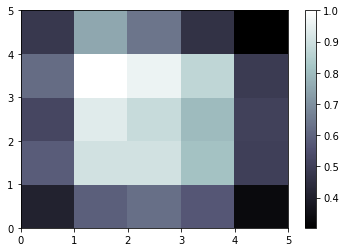

In [ ]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som2.distance_map().T) # Distance map as background reference
colorbar()
show()

From the above distance map we can measure the distance between the weight vector and winner neuron nd we can say on observing the above map that darker the color is less is the distance, and lighter the color more is the distance.

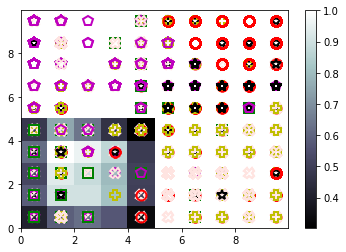

In [ ]:
y = dataset.iloc[:,0].values
bone()

pcolor(som2.distance_map().T)

colorbar()
markers = ['o', 's','m','M','p','P','*','k','X','b'] 

colors = ['r', 'g','b','c','m','y','k','y','mistyrose','hotpink']

for i, x in enumerate(X):

    w = som.winner(x)

    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],  markeredgecolor = colors[y[i]],  markerfacecolor = 'None',  markersize = 10,  markeredgewidth = 2)

show()

**CONCLUSION**

* From the Basic Explanatory Analysis we observe that there are 4584 rows and 785 columns,and we observe that all the values are the combination of float and integer datatype.
* As the algorithmn steps ,fiest here we initialize weights ,then compute the eucledian distance ,we then consider the minimum weight and that partcular neuron is the winner ,then the radius of neighborhood is fixed by default the value is 1 ,and then we update the weights.Here,the hyperparameters are alpha(learning parameter),radius size,sigma and iterations.
* For the first case,we observe that the size is 10*10 that is 100 neurons ,with sigma 1 and other hyperparameter value.
* For the second case ,we have 30*30 model which is considered to be the best .here we observe wider range of neurons and many cluters that are formed.
* For third case we have 5*5 that is 25 neurons ,here it can be onserved that all the neurons are classified without overlaping each other and its easier to interpret.
* From the Eucledian distance colorbar plot we can observe that darker the colour smaller the distance and lighter the colour is larger the distance.
* As the grid hyperparameter is increased ,it can be observed that we can observe a lot of clusters but a very tight packing complex graph. we can also observe the neurons overlapping because the distance is calculated not really on any particular bases and hence neurons may overlap this is considered as one of the diadvantages of the algorithm.